

# Project: Investigate a Dataset - [TMDB MOVIE DATA SET]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## INTRODUCTION

### RESEARCH QUESTIONS

1.Which are the most produced genres?

2.Are the most produced genres also the most profitable ones?

3.Are the most profitable movies most expensive to make?

4.Does runtime affect profit?

5.Which month is the best one to release movies ?


### lmporting the necessary libraries and checking out the data set


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


loading the data and cleaning the data with a function;

In [3]:
def wrangle(filepath):
    #read csv file into dataframe
    movie_df=pd.read_csv(filepath)
    
    #dropping the columns that have null values and the ones i will not need
    movie_df.drop(columns=["tagline","keywords","homepage","cast","director","overview","imdb_id","production_companies"], inplace= True)
    
    #removing duplicates
    movie_df.drop_duplicates(inplace=True)#dropping the duplicates
    
    
    return movie_df

In [4]:
#calling the function
movie_df = wrangle("Database_TMDb_movie_data/tmdb-movies.csv")
print("movie df shape:", movie_df.shape)
movie_df.head()

movie df shape: (10865, 13)


,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Data set has 10866 rows and 21 columns

In [5]:
movie_df.columns #the columns in the dataset

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [6]:
movie_df.info()#checking out the null values in this data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


## DATA CLEANING

In [7]:
movie_df.isna().sum()#checking the null values in each column

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [8]:
movie_df.duplicated().value_counts()#checking the duplicated

False    10865
dtype: int64

There are no duplicates, no null values and the columns that i dont need have been removed from the function above


## Exploratory Data Analysis


### Research Question 1 (Which are the most produced genres?)

In [9]:
movie_df.describe()#checking the mean, median, standard deviation of this data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:

movie_df['genres'].nunique()#checking how many genres are in this data

2039

In [11]:
top_15_genres=movie_df['genres'].value_counts().head(15)
top_15_genres
#plotting the top 15 genres by its count

Drama                   712
Comedy                  712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Name: genres, dtype: int64

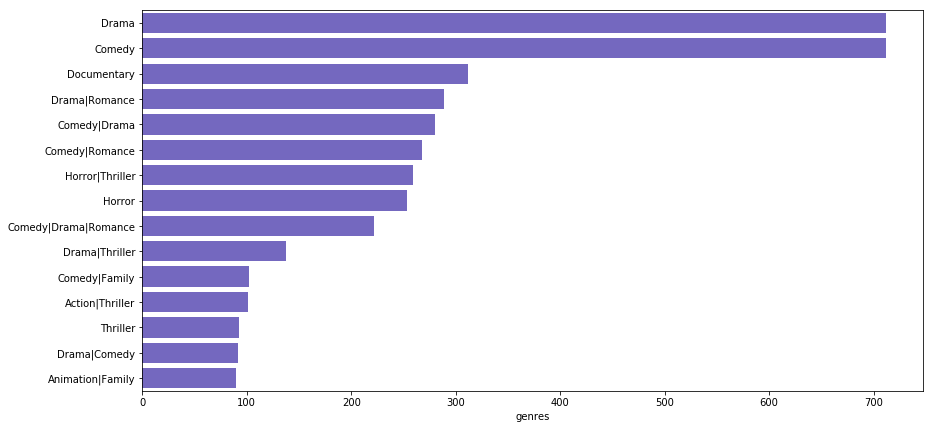

In [12]:
plt.figure(figsize=(14,7))
sns.barplot(x = top_15_genres, y=top_15_genres.index , color="slateblue");

Drama,comedy , documentary and romance are the produced genres. but are they the most profitable genres?.Let us see..

### Research Question 2  (Are the most produced genres also the most profitable ones?)

In [13]:
#adding the profit column by calculating the net profit
movie_df['profit']=movie_df['revenue']-movie_df['budget']

In [14]:
#grouping bt genres and getting the specific columns i need
profit_df=movie_df.groupby('genres',as_index=False)[['budget','revenue','profit']].mean().sort_values(by='profit',
                                                                                                      ascending=False)

In [15]:
profit_df.head(10)

,genres,budget,revenue,profit
922,Crime|Drama|Mystery|Thriller|Action,22000000.0,1.106280e+09,1.084280e+09
114,Action|Adventure|Science Fiction|Fantasy,100000000.0,1.034089e+09,9.340891e+08
1303,Family|Fantasy|Adventure,200000000.0,1.025467e+09,8.254671e+08
550,Adventure|Fantasy|Family|Mystery,150000000.0,9.382127e+08,7.882127e+08
1751,Science Fiction|Adventure|Family|Fantasy,10500000.0,7.929106e+08,7.824106e+08
1286,Family|Animation|Drama,45000000.0,7.882418e+08,7.432418e+08
1793,Science Fiction|Thriller|Action|Adventure,130000000.0,8.474235e+08,7.174235e+08
355,Action|Thriller|Science Fiction|Mystery|Adventure,160000000.0,8.255000e+08,6.655000e+08
1754,Science Fiction|Adventure|Thriller,125000000.0,7.521002e+08,6.271002e+08
1752,Science Fiction|Adventure|Fantasy,75000000.0,6.912107e+08,6.162107e+08


In [16]:
top_15_profit_df=profit_df.head(15)#decided to use 15 top genres only by profit

In [17]:
top_15_profit_df

,genres,budget,revenue,profit
922,Crime|Drama|Mystery|Thriller|Action,22000000.0,1.106280e+09,1.084280e+09
114,Action|Adventure|Science Fiction|Fantasy,100000000.0,1.034089e+09,9.340891e+08
1303,Family|Fantasy|Adventure,200000000.0,1.025467e+09,8.254671e+08
550,Adventure|Fantasy|Family|Mystery,150000000.0,9.382127e+08,7.882127e+08
1751,Science Fiction|Adventure|Family|Fantasy,10500000.0,7.929106e+08,7.824106e+08
1286,Family|Animation|Drama,45000000.0,7.882418e+08,7.432418e+08
1793,Science Fiction|Thriller|Action|Adventure,130000000.0,8.474235e+08,7.174235e+08
355,Action|Thriller|Science Fiction|Mystery|Adventure,160000000.0,8.255000e+08,6.655000e+08
1754,Science Fiction|Adventure|Thriller,125000000.0,7.521002e+08,6.271002e+08
1752,Science Fiction|Adventure|Fantasy,75000000.0,6.912107e+08,6.162107e+08


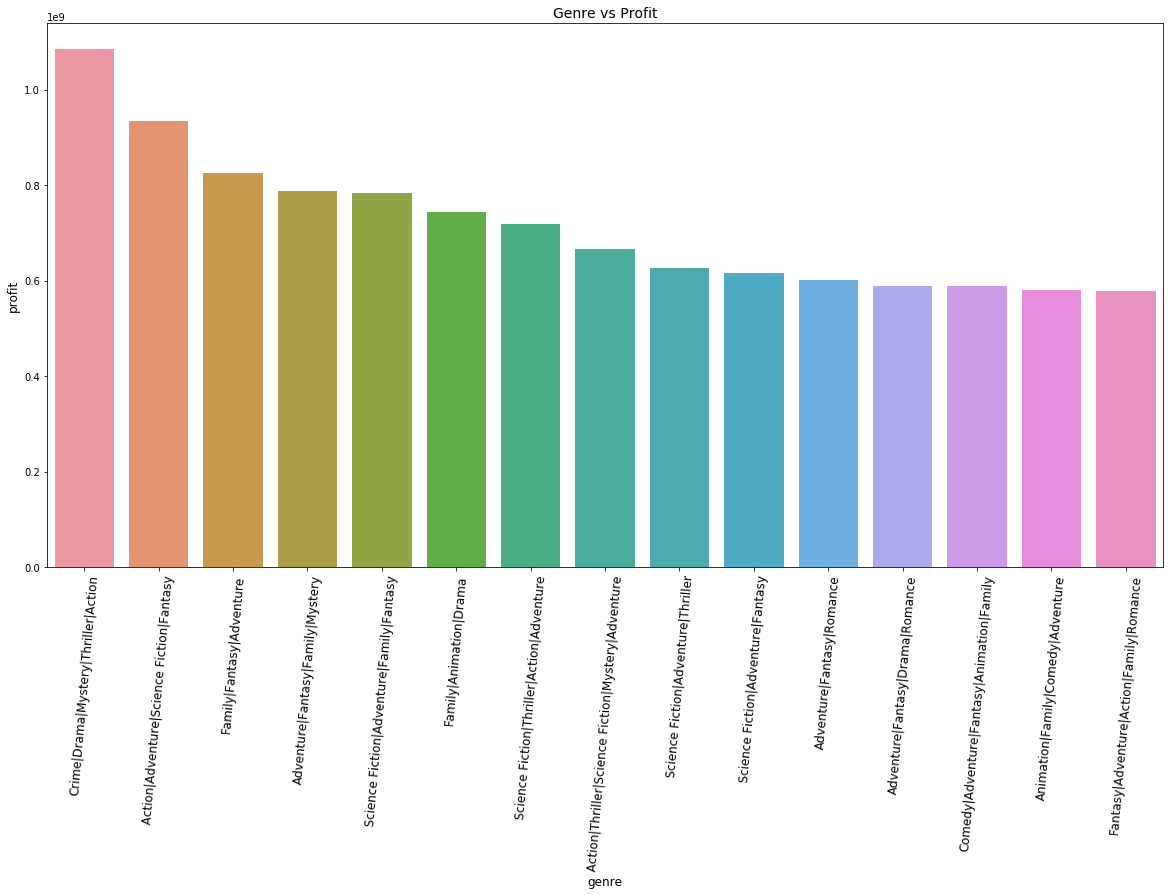

In [18]:
# bar graph of genre ns profit
plt.figure(figsize=(20,10))
ax=sns.barplot(x=top_15_profit_df['genres'], y=top_15_profit_df['profit'])
plt.ylabel('profit',fontsize=12)
plt.xlabel('genre',fontsize=12)
plt.title('Genre vs Profit',fontsize=14)
plt.xticks(rotation=85,fontsize=12);

The most profitable genres like drama related, Action , Thriller, mystery, science fiction and the adventure genres
related are making the most profit. and indeed , darama related movies are the most profitable genres.

### Research question: Are the most profitable movies most expensive to make?

Text(0.5,1,'production budget vs profit')

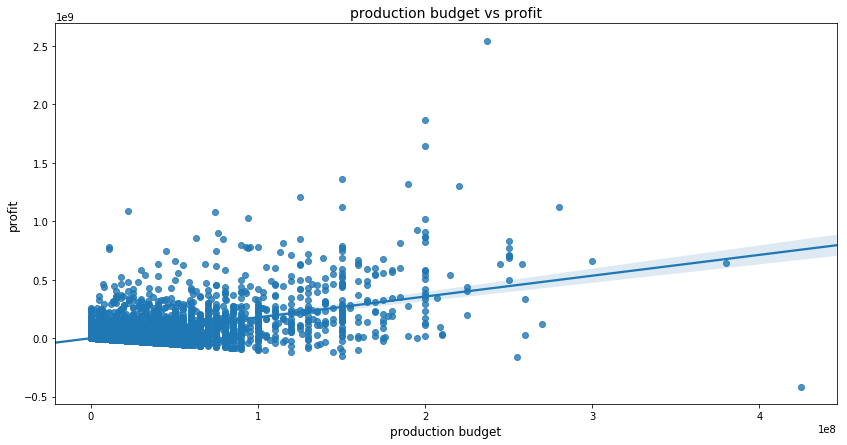

In [19]:
#doing a regression plot to see if the relatuinship between budget and profit is linear
plt.figure(figsize=(14,7))
ax=sns.regplot(y=movie_df['profit'], x=movie_df['budget'])
plt.xlabel('production budget',fontsize=12)
plt.ylabel('profit',fontsize=12)
plt.title('production budget vs profit',fontsize=14)

In [20]:
movie_df["budget"].corr(movie_df["profit"])#decided to check the correlation

0.570222438538682

The relationship seems to be correlated at some point, that means,the more you spend, the mostly likely to make profit,
but thats not necesarrily the case, as the relationship is not strong , it is at 0.57

### Research question:Which are the most expensive genres to produce?

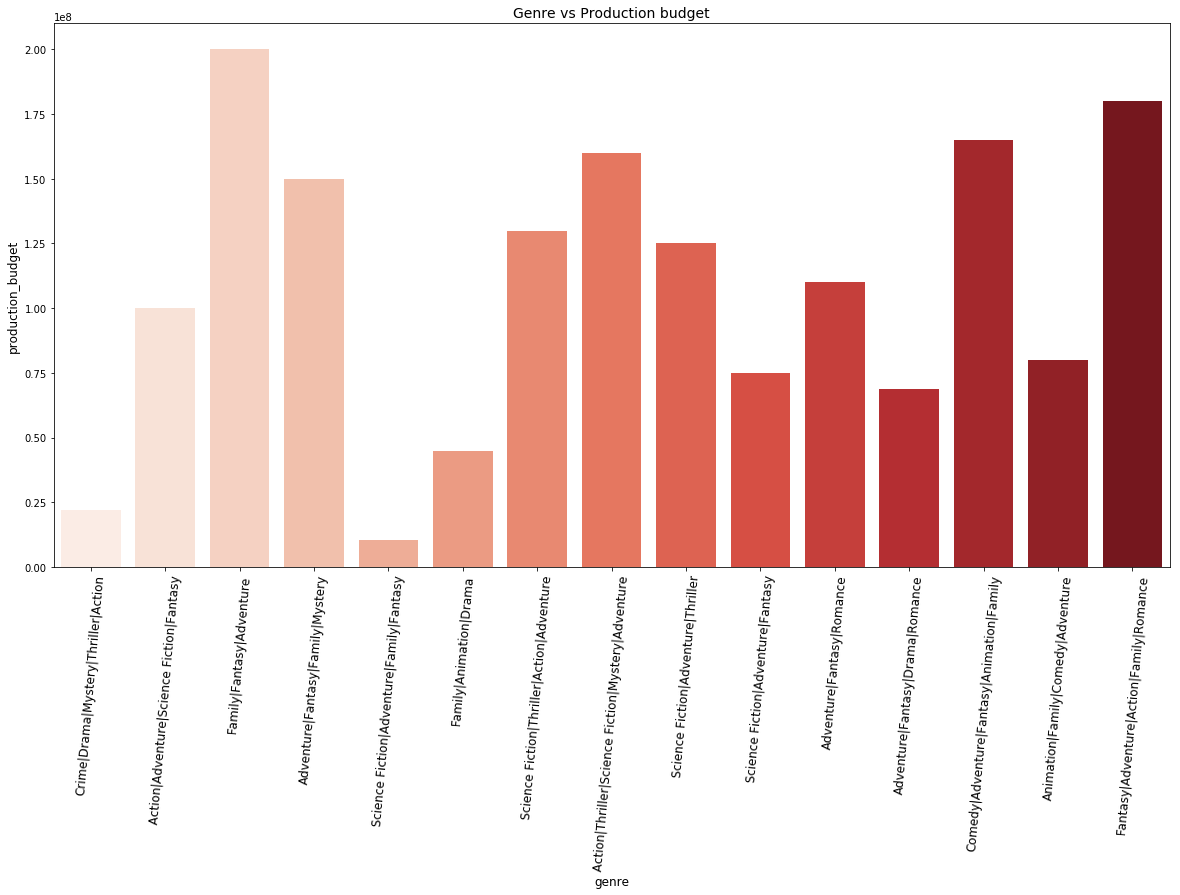

In [21]:
plt.figure(figsize=(20,10))

ax=sns.barplot(x=top_15_profit_df['genres'], y=top_15_profit_df['budget'],palette='Reds')
plt.ylabel('production_budget',fontsize=12)
plt.xlabel('genre',fontsize=12)
plt.title('Genre vs Production budget',fontsize=14)
plt.xticks(rotation=85,fontsize=12);

Adventure related movies and crime, drama ,mystery, are very expensive to make.

### Research question:Does runtime affect profit?

In [22]:
#grouping by runtime and getting the columns i need
runtime_df=movie_df.groupby('runtime',as_index=False)[['budget','revenue','profit']].mean().sort_values(by='profit',
                                                                                                        ascending=False)

In [23]:
runtime_df=runtime_df.head(10)# setting the dataframe to only have 10 columns highest by profit
runtime_df.head()

,runtime,budget,revenue,profit
188,194,2.000000e+08,1.845034e+09,1.645034e+09
193,201,4.700000e+07,5.594445e+08,5.124445e+08
164,169,1.570000e+08,6.163194e+08,4.593194e+08
157,162,5.787500e+07,4.231884e+08,3.653134e+08
174,179,2.633333e+07,3.087625e+08,2.824291e+08


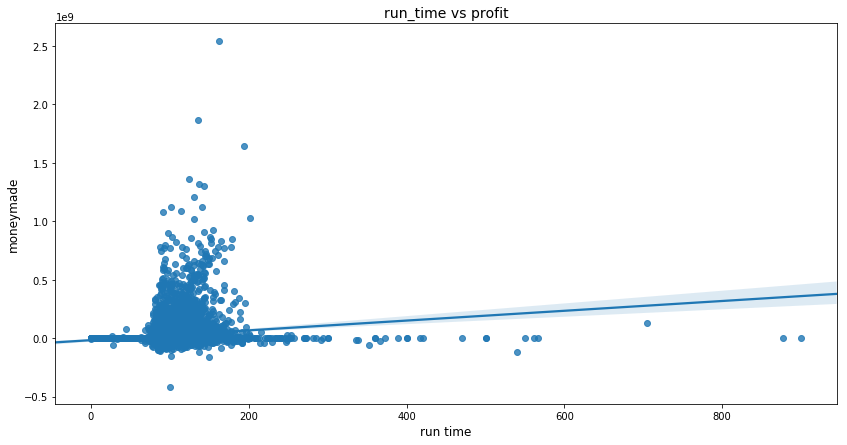

In [24]:
#plotrting a reg plot of runtime aganist profit to see if they are correlated
plt.figure(figsize=(14,7))
ax=sns.regplot(y=movie_df['profit'], x=movie_df['runtime'])
plt.xlabel('run time',fontsize=12)
plt.ylabel('moneymade',fontsize=12)
plt.title('run_time vs profit',fontsize=14);

In [25]:
#plt.figure(figsize=(14,7))
#def plotting(y , x , xlabel,ylabel,title):
    
   # ax=sns.regplot(y, x)
   # plt.xlabel(xlabel,fontsize=12)
    #plt.ylabel(ylabel,fontsize=12)
    #plt.title(title,fontsize=14)
    
    #return ax;

In [26]:
#plotting(y=movie_df['profit'], x=movie_df['runtime'],'run time','moneymade','run_time vs profit')

The relationship is not strong, that means runtime does not affect profit .

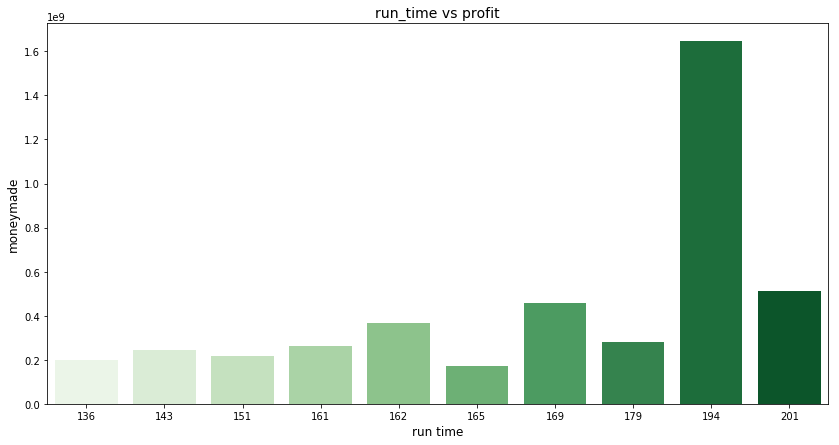

In [27]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=runtime_df['profit'], x=runtime_df['runtime'],palette='Greens')
plt.xlabel('run time',fontsize=12)
plt.ylabel('moneymade',fontsize=12)
plt.title('run_time vs profit',fontsize=14);
#bar graph of run time vs profit

This graph says that movies that are 194 minutes make so much profit, while of 179 doesnnot, which does not make any sense
and it means runtime does not affect profit.

### Research question:Which month is the best one to release movies ?

In [28]:
movie_df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [29]:
#changing the date format this column to type datetime
movie_df['release_date']=pd.to_datetime(movie_df['release_date'])

In [30]:
movie_df["release_date"].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [31]:
#showing only the month in the dates
months=[dates.strftime('%B') for dates in movie_df['release_date']]

In [32]:
#creating a new column in the movie_df to show only the months I created in the cell above
movie_df['month']=months

In [33]:
month_df=movie_df.groupby('month',as_index=False)['profit'].mean()#grouping by month and getting the profit

In [34]:
month_df

,month,profit
0,April,1.986922e+07
1,August,1.566722e+07
2,December,3.931195e+07
3,February,1.523901e+07
4,January,7.299410e+06
5,July,3.765463e+07
6,June,5.279089e+07
7,March,2.346622e+07
8,May,4.257437e+07
9,November,3.752400e+07


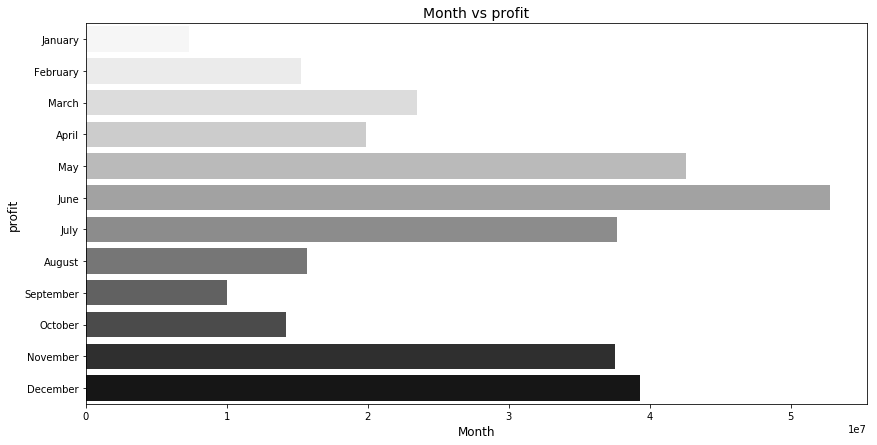

In [35]:
#plottting month vs budget
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_df['month'], x=month_df['profit'],palette='Greys',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])#ordering the months
plt.xlabel('Month',fontsize=12)
plt.ylabel('profit',fontsize=12)
plt.title('Month vs profit',fontsize=14);

Producing movies in the Month of May,June,July,November,December has the most profit makes the most
returns.


## Conclusions

Producing movies in the Month of May, June,July,November,December has the most profit so releasing movies on these months 
guarantee high returns.

Producing drama related movies with comedy,Action,mystery and adventure because apart from being the most produced genres,they are also very profitable.

The length of the movie does not matter.

## Limitations
The data set is not enough to provide concrete conclusions on a business , There's abit much that canbe analyzed to come
up with more concrete solutionsrecommendations.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0